In [41]:
import pandas as pd

In [42]:
pd.read_csv("Sales Transaction v.4a.csv")

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [43]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df['Date'] = pd.to_datetime(df['Date'])
num_records = df.shape[0]
unique_values = df['ProductName'].unique()
total_unique_values = len(unique_values)
min_date = df['Date'].min()
max_date = df['Date'].max()

print("Number of records:", num_records)
print("Total products:", total_unique_values)
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Number of records: 536350
Total products: 3768
Minimum Date: 2018-12-01 00:00:00
Maximum Date: 2019-12-09 00:00:00


In [44]:
Luck = df['TransactionNo'].str.contains('C')
Luck

0         False
1         False
2         False
3         False
4         False
          ...  
536345     True
536346     True
536347     True
536348     True
536349     True
Name: TransactionNo, Length: 536350, dtype: bool

In [45]:
df[Luck]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [46]:
cancell_df = df[Luck]
df = df[~Luck]
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

This chart, titled "Total Price Over Time by Year," visually represents the monthly total sales for the years 2018 and 2019. The X-axis displays the months from January (1) to December (12), while the Y-axis shows the total price in terms of millions, as indicated by the scale (1e6).

From the graph, it's evident that both years follow different trends. In 2018 (represented by the blue line), the sales show relatively stable figures throughout the year, except for a slight increase towards the end of the year. The sales pattern for 2019 (orange line) is notably different; it starts at a similar level as 2018, dips slightly in the early months, and then shows a steady increase from mid-year, peaking dramatically in November before a sharp drop in December.

The purpose of the Python code used to generate this chart is to calculate the total sales for each month by multiplying the 'Quantity' of items sold by their 'Price', resulting in the 'TotalPrice'. This total price is then aggregated by year and month to observe how total sales vary over time within each year. This visualization helps in identifying seasonal trends, evaluating the effectiveness of marketing campaigns, or planning for inventory and staffing needs based on expected sales volume variations throughout the year.

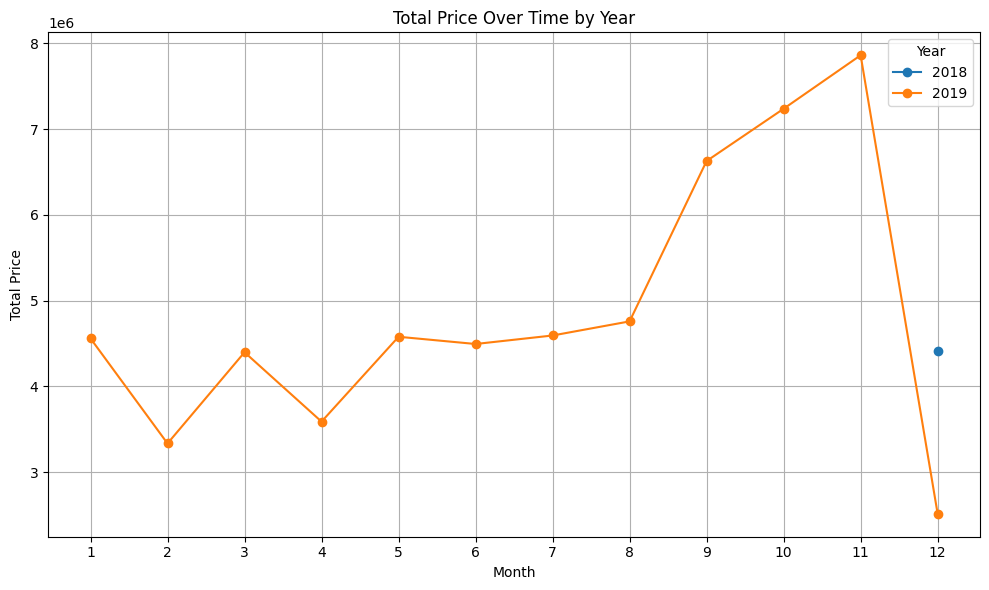

In [49]:
df['TotalPrice'] = df['Quantity'] * df['Price']
yearly_monthly_total_price = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
plt.figure(figsize=(10, 6)) 
for year in yearly_monthly_total_price['Year'].unique():
    yearly_data = yearly_monthly_total_price[yearly_monthly_total_price['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['TotalPrice'], marker='o', label=str(year))

plt.title('Total Price Over Time by Year')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.xticks(range(1, 13))  
plt.tight_layout()
plt.show() 

In [50]:
non_integers = df[~df['CustomerNo'].apply(lambda x: x.is_integer())]


non_integers

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,TotalPrice
298352,558245,2019-06-27,22734,Set Of 6 Ribbons Vintage Christmas,10.25,8,NaN,United Kingdom,2019,6,82.0


In [51]:
df['CustomerNo'].fillna(-1, inplace=True)

/var/folders/1j/5y683n250s9btbcf33_d69840000gn/T/ipykernel_8820/3672449159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerNo'].fillna(-1, inplace=True)


In [52]:
df['CustomerNo'] = df['CustomerNo'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527765 entries, 0 to 536324
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  527765 non-null  object        
 1   Date           527765 non-null  datetime64[ns]
 2   ProductNo      527765 non-null  object        
 3   ProductName    527765 non-null  object        
 4   Price          527765 non-null  float64       
 5   Quantity       527765 non-null  int64         
 6   CustomerNo     527765 non-null  int64         
 7   Country        527765 non-null  object        
 8   Year           527765 non-null  int32         
 9   Month          527765 non-null  int32         
 10  TotalPrice     527765 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 44.3+ MB


In [53]:
df.describe(include = ['number'])

,Price,Quantity,CustomerNo,Year,Month,TotalPrice
count,527765.000000,527765.000000,527765.000000,527765.000000,527765.000000,5.277650e+05
mean,12.629636,10.594674,15231.597870,2018.921524,7.562315,1.193068e+02
std,7.933217,156.786646,1716.648616,0.268920,3.509036,1.851191e+03
min,5.130000,1.000000,-1.000000,2018.000000,1.000000,5.130000e+00
25%,10.990000,1.000000,13813.000000,2019.000000,5.000000,1.717000e+01
50%,11.940000,3.000000,15159.000000,2019.000000,8.000000,4.383000e+01
75%,14.090000,11.000000,16729.000000,2019.000000,11.000000,1.194000e+02
max,660.620000,80995.000000,18287.000000,2019.000000,12.000000,1.002718e+06


From the chart, we observe that the "Paper Craft Little Birdie" and "Medium Ceramic Top Storage Jar" are the top-selling items, with quantities approaching 80,000 units. Following these, "Popcorn Holder" and "World War 2 Gliders Assorted Designs" also show significant sales volumes, though slightly less than the top two. Other items like "Jumbo Bag Red Retrospot" and "Hanging Heart Light Holder" maintain a robust but lower sales quantity in comparison. The list concludes with products like "Rabbit Night Light" and "Mini Paint Set Vintage" showing the least quantities among the top ten but still substantial enough to make the list.

This visualization is valuable for inventory management and marketing strategy development, as it highlights which products are most popular among consumers, potentially indicating trends or preferences that can be leveraged in future business decisions. The code used to generate this chart groups data by product names, sums up the quantities, and then selects the ten products with the highest total sales to plot. The use of a bar chart is particularly effective for this type of comparison because it allows for easy visual comparison across categories.

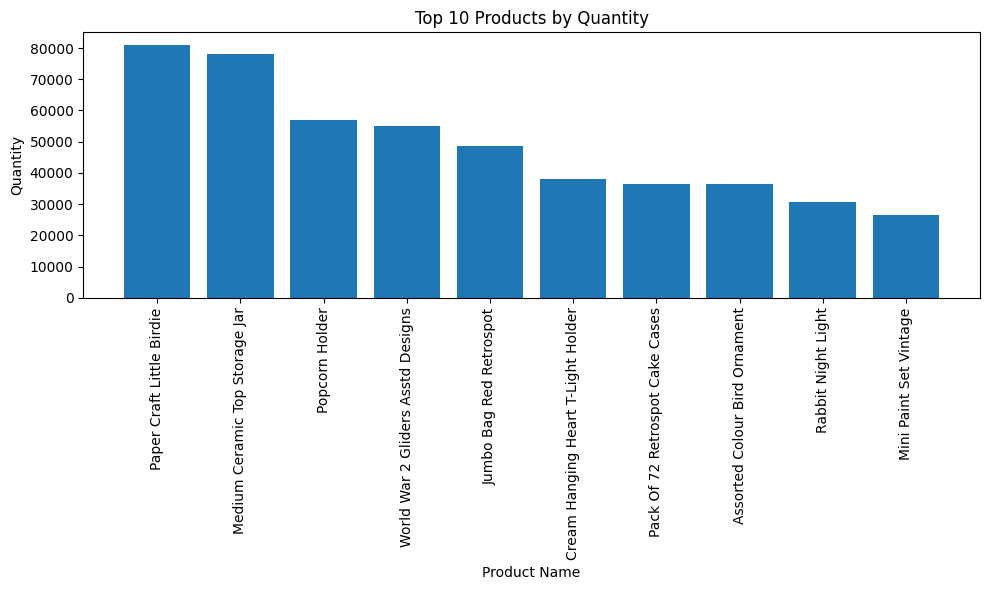

In [54]:
product_quantity = df.groupby('ProductName')['Quantity'].sum()
top_10_products = product_quantity.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6)) 
plt.bar(top_10_products.index, top_10_products.values)
plt.title('Top 10 Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

The chart titled "Quantity Over Time ('Popcorn Holder')" presents the sales data for the "Popcorn Holder" product across different dates in 2019. This line chart with markers illustrates the quantity of the product sold on specific dates, depicted on the X-axis, with the corresponding quantities on the Y-axis.

The plot reveals several notable peaks, indicating days when sales were exceptionally high, with the most significant spike reaching 4,000 units. These spikes may indicate promotional events, seasonal demands, or specific sales campaigns. Meanwhile, on most days, the sales quantities are relatively low.

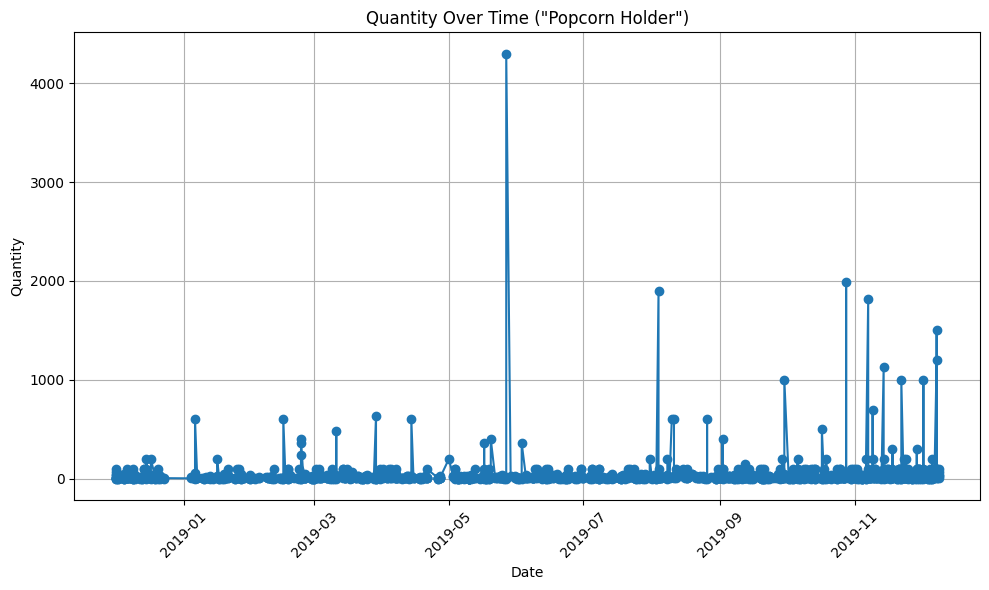

In [55]:
product_df = df[df["ProductName"] == "Popcorn Holder"]

# Plotting
plt.figure(figsize=(10, 6))  
plt.plot(product_df['Date'], product_df['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Over Time ("Popcorn Holder")')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [56]:
df.describe(include = ['object'])

,TransactionNo,ProductNo,ProductName,Country
count,527765,527765,527765,527765
unique,19790,3753,3753,38
top,573585,85123A,Cream Hanging Heart T-Light Holder,United Kingdom
freq,1111,2336,2336,477771


In [57]:
df.sort_values(by = 'Quantity', ascending = False).head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,TotalPrice
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446,United Kingdom,2019,12,1002718.10
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346,United Kingdom,2019,1,840113.80
41367,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256,United Kingdom,2019,11,77622.60
117790,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.47,4800,12901,United Kingdom,2019,10,50256.00
331834,554868,2019-05-27,22197,Popcorn Holder,10.99,4300,13135,United Kingdom,2019,5,47257.00
438495,544612,2019-02-22,22053,Empire Design Rosette,11.09,3906,18087,United Kingdom,2019,2,43317.54
269982,560599,2019-07-19,18007,Essential Balm 35g Tin In Envelope,10.31,3186,14609,United Kingdom,2019,7,32847.66
376379,550461,2019-04-18,21108,Fairy Cake Flannel Assorted Colour,12.40,3114,15749,United Kingdom,2019,4,38613.60
483801,540815,2019-01-11,21108,Fairy Cake Flannel Assorted Colour,12.40,3114,15749,United Kingdom,2019,1,38613.60
105437,573995,2019-11-02,16014,Small Chinese Style Scissor,10.58,3000,16308,United Kingdom,2019,11,31740.00


In [58]:
cancelled_df = df[Luck]
cancelled_df.sort_values(by = 'Quantity').head(10)

/var/folders/1j/5y683n250s9btbcf33_d69840000gn/T/ipykernel_8820/1648695979.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cancelled_df = df[Luck]


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,TotalPrice



The chart titled "Quantity Over Time (Monthly)" provides a visual representation of the monthly sales quantities for a product across the span from January 2019 to January 2020. The X-axis denotes each month, while the Y-axis indicates the quantity sold, tracing a line that connects data points marked by circles to show sales trends throughout the year.

Key observations from the graph include two prominent sales peaks: one in August 2019 and a much larger one in December 2019, suggesting a significant increase in demand or successful promotional activities during these months. The sales then drastically drop after December, returning to levels similar to the beginning of the year by January 2020.



/var/folders/1j/5y683n250s9btbcf33_d69840000gn/T/ipykernel_8820/1148380587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Date'] = pd.to_datetime(product_df['Date'])


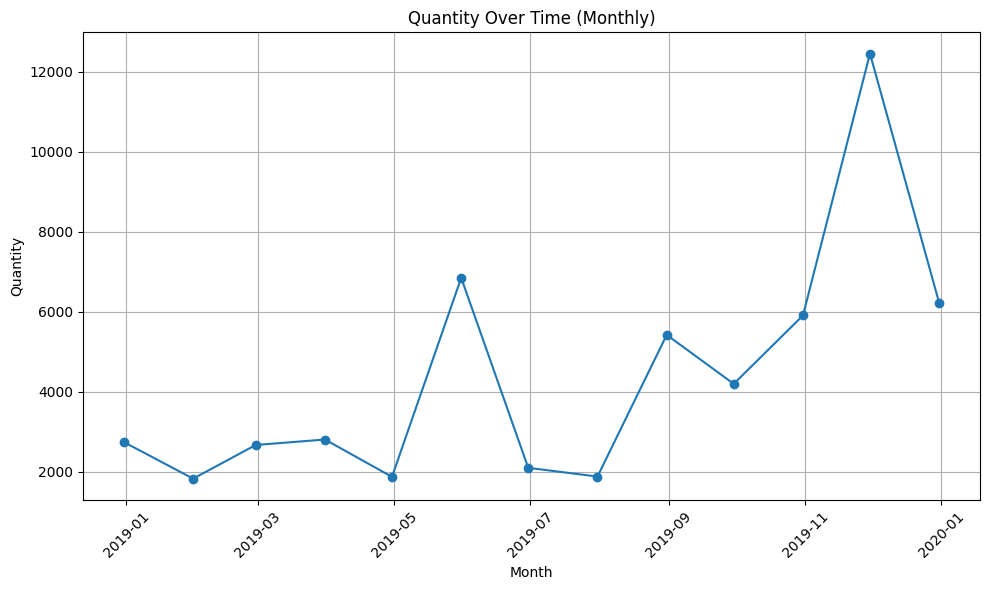

In [59]:
product_df['Date'] = pd.to_datetime(product_df['Date'])
monthly_data = product_df.resample('ME', on='Date').sum()

plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', linestyle='-')
plt.title('Quantity Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar chart titled "Top 10 Customers who Bought Popcorn Holder" illustrates the quantities of Popcorn Holder purchased by the top 10 customers, identified by their CustomerID. Each bar represents a different customer, with the height indicating the total quantity purchased by that customer.

From the chart, we observe a pronounced disparity in purchase volumes among these top customers. The customer with ID 17949 stands out dramatically, having purchased over 10,000 units, which is significantly higher than any other customer. The following customer, ID 12931, bought approximately half that amount, and the quantities decrease progressively among the remaining customers in the list, highlighting a steep drop-off after the top buyer.

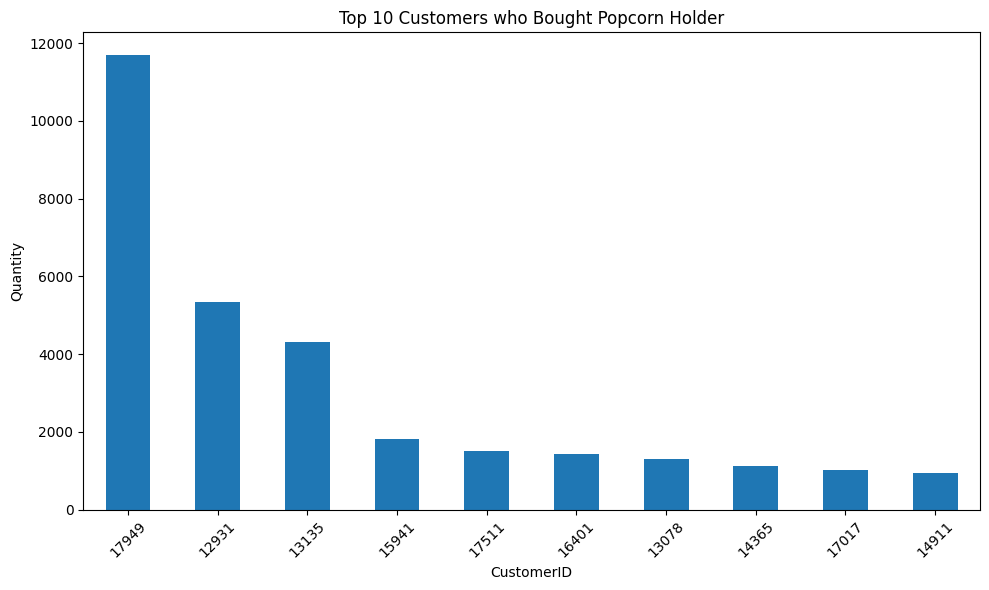

In [60]:
popcorn_holder_data = df[df['ProductName'] == 'Popcorn Holder']

# Group data by 'CustomerNo' and sum the quantities
customer_quantity = popcorn_holder_data.groupby('CustomerNo')['Quantity'].sum()

# Find the top 10 customers who bought "Popcorn Holder"
top_10_customers = customer_quantity.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar')
plt.title('Top 10 Customers who Bought Popcorn Holder')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [61]:
df.value_counts('Country').head(10)

Country
United Kingdom    477771
France             10393
Germany            10240
EIRE                7807
Belgium             2507
Spain               2386
Netherlands         2326
Switzerland         2303
Portugal            1838
Australia           1631
Name: count, dtype: int64

In [62]:
transaction = df[['TransactionNo','ProductName','Quantity','Country']]
transaction = transaction[transaction['Country'].isin(['United Kingdom'])]
transaction.drop('Country',axis=1,inplace=True)

In [63]:
basket = transaction.groupby(['TransactionNo','ProductName'])['Quantity'].sum().unstack().reset_index().fillna(0).drop('TransactionNo',axis=1)

basket_sets = basket.map(lambda x: 0 if x <=0 else 1)
basket_sets.head()

ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Daisy Pegs In Wood Box,12 Egg House Painted Wood,12 Hanging Eggs Hand Painted,12 Ivory Rose Peg Place Settings,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,...,Zinc Metal Heart Decoration,Zinc Star T-Light Holder,Zinc Sweetheart Soap Dish,Zinc Sweetheart Wire Letter Rack,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small,Zinc Top 2 Door Wooden Shelf,Zinc Willie Winkie Candle Stick,Zinc Wire Kitchen Organiser,Zinc Wire Sweetheart Letter Tray
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The heatmap titled "Quantity of Products Purchased by CustomerNo 17949.0" showcases the purchasing patterns of a particular customer over the year 2019. Each cell represents the quantity of a specific product purchased each month, with darker colors indicating higher quantities.

This customer, notable for their high purchase volume of "Popcorn Holder," shows considerable purchasing activity across various other products as well. The standout purchase is the "Popcorn Holder" with 3700 units in December 2019, highlighting a significant spike that suggests a potential bulk purchase or a large-scale event. Other products such as the "Regency Cakes Stand 3 Tier" and the "Home Sweet Home Mug" also show recurring purchases throughout the year, indicating regular demand or preference.

/var/folders/1j/5y683n250s9btbcf33_d69840000gn/T/ipykernel_8820/1773550913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Year_Month'] = pd.to_datetime(customer_data['Date']).dt.to_period('M')


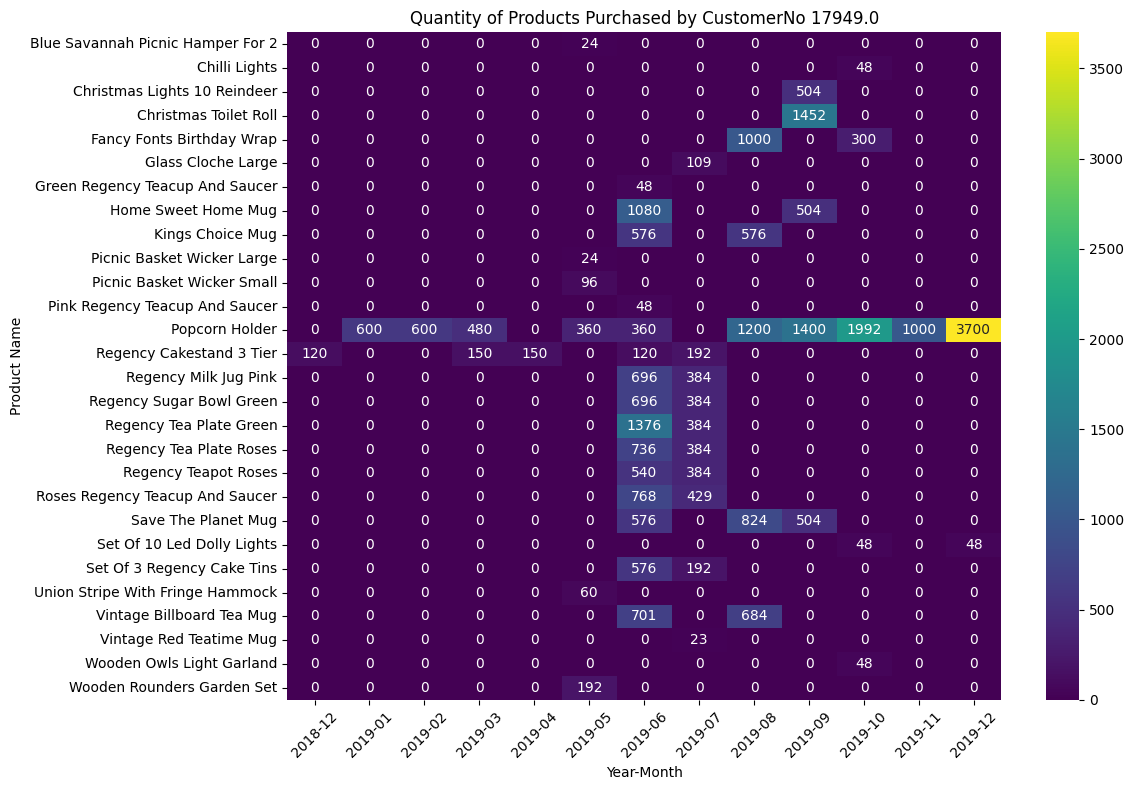

In [64]:
customer_data = df[df['CustomerNo'] == 17949.0]

customer_data['Year_Month'] = pd.to_datetime(customer_data['Date']).dt.to_period('M')

customer_product_quantity = customer_data.pivot_table(index='ProductName', columns='Year_Month', values='Quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(customer_product_quantity, cmap='viridis', annot=True, fmt='d')
plt.title('Quantity of Products Purchased by CustomerNo 17949.0')
plt.xlabel('Year-Month')
plt.ylabel('Product Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [65]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter transactions for Popcorn Holder between months 5 and 6
popcorn_transactions = df[(df['ProductName'] == 'Popcorn Holder') & (df['Date'].dt.month.between(5, 6))]

# Group by date and sum the quantities sold
sales_by_date = popcorn_transactions.groupby('Date')['Quantity'].sum()

# Find the date with the highest total quantity sold
top_date = sales_by_date.idxmax()

# Display the top date and its sales
print("Top Date with Best Sales of Popcorn Holder:")
print("Date:", top_date)
print("Total Quantity Sold:", sales_by_date[top_date])

Top Date with Best Sales of Popcorn Holder:
Date: 2019-05-27 00:00:00
Total Quantity Sold: 4314


In [66]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter transactions for the product "Popcorn Holder" on the date 2019-05-27
popcorn_holder_transactions_2019_05_27 = df[(df['Date'] == '2019-05-27') & (df['ProductName'] == 'Popcorn Holder')]

# Display the transactions for the product "Popcorn Holder" on the date 2019-05-27
print("Transactions for Popcorn Holder on 2019-05-27:")
print(popcorn_holder_transactions_2019_05_27)

Transactions for Popcorn Holder on 2019-05-27:
       TransactionNo       Date ProductNo     ProductName  Price  Quantity  \
331834        554868 2019-05-27     22197  Popcorn Holder  10.99      4300   
332493        554958 2019-05-27     22197  Popcorn Holder  11.92         8   
332545        554960 2019-05-27     22197  Popcorn Holder  11.92         4   
332588        554961 2019-05-27     22197  Popcorn Holder  11.92         2   

        CustomerNo         Country  Year  Month  TotalPrice  
331834       13135  United Kingdom  2019      5    47257.00  
332493       12958  United Kingdom  2019      5       95.36  
332545       12960  United Kingdom  2019      5       47.68  
332588       15961  United Kingdom  2019      5       23.84  


The heatmap titled "Top 10 Product Purchase Frequency by Date for Customer 13135.0" illustrates the purchasing patterns of a specific customer for their top 10 products over selected dates. Each cell in the heatmap represents the quantity of a product purchased on a particular date, with darker shades of purple indicating higher quantities, and the highlighted yellow cell showing the maximum purchase.

From this visualization, it's clear that "Popcorn Holder" is the standout product for this customer, with a significant purchase of 4300 units on a single date. The rest of the products have much lower purchase frequencies, with some purchases scattered across various dates. This kind of data is crucial for identifying key products that are important to the customer and understanding their buying behavior.

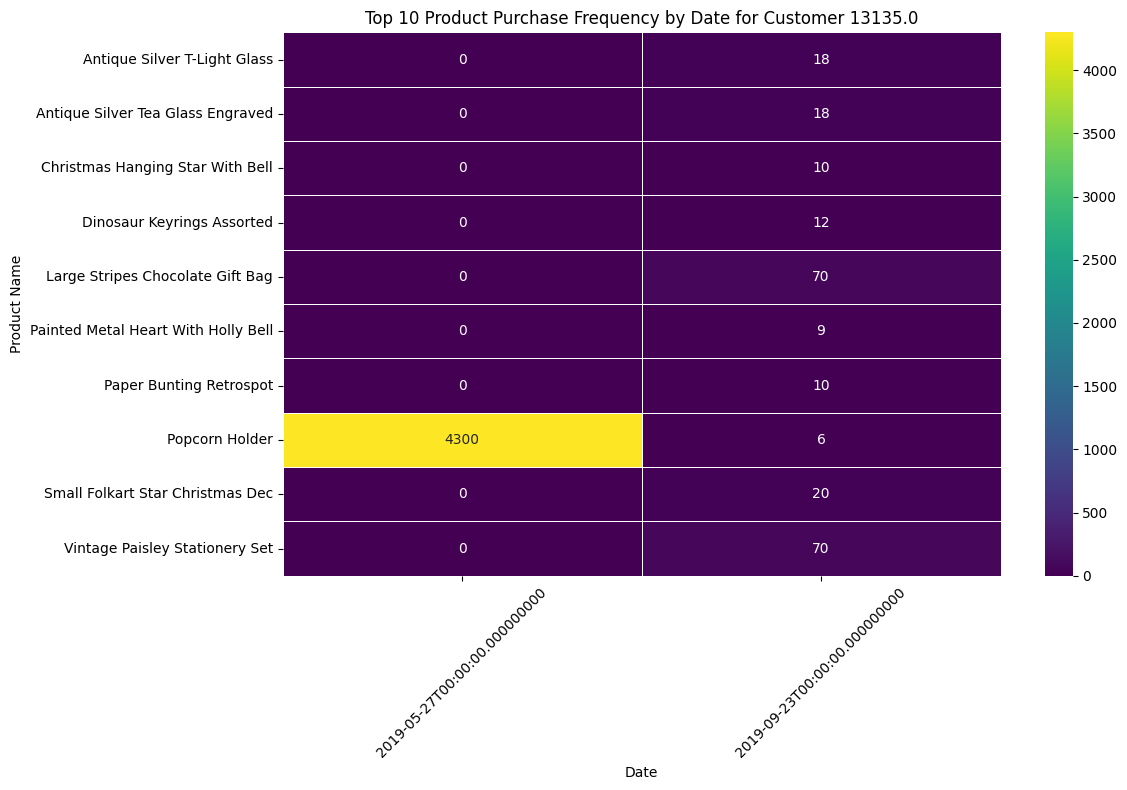

In [67]:
customer_data = df[df['CustomerNo'] == 13135.0]

# Group data by product name and sum the quantity
product_quantity = customer_data.groupby('ProductName')['Quantity'].sum()

# Select top 10 products
top_10_products = product_quantity.nlargest(10)

# Filter customer data for top 10 products
top_10_customer_data = customer_data[customer_data['ProductName'].isin(top_10_products.index)]

# Pivot the filtered DataFrame to create a matrix of product purchases by date
pivot_table = top_10_customer_data.pivot_table(index='ProductName', columns='Date', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5, annot=True, fmt='d')
plt.title('Top 10 Product Purchase Frequency by Date for Customer 13135.0')
plt.xlabel('Date')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
customer_data = df[df['CustomerNo'] == 13135.0]

# Get unique dates for the customer's transactions
unique_dates = customer_data['Date'].unique()

# Display the unique dates
print("Dates for customer 13135.0:")
print(unique_dates)


Dates for customer 13135.0:
<DatetimeArray>
['2019-09-23 00:00:00', '2019-05-27 00:00:00']
Length: 2, dtype: datetime64[ns]
